In [1]:
import pandas as pd
import warnings
t=pd.read_csv("/content/framingham.csv")
print(t)
t1=t.describe()
print(t1)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [2]:
dt=t.dtypes
shape=t.shape
print("t types of each column:\n",dt)
print("Shape:",shape)

t types of each column:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
Shape: (4238, 16)


In [3]:
nullvalues=t.isnull()
print(nullvalues)
t_mean=t.fillna(0)
print(t_mean)

       male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4233  False  False      False          False       False   False   
4234  False  False      False          False       False   False   
4235  False  False      False          False       False    True   
4236  False  False      False          False       False   False   
4237  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False    

In [4]:
X = t.drop(columns=["TenYearCHD"])
y = t["TenYearCHD"]

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  

Target (y):
 0    0
1    0
2    0
3    1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming X and y are defined elsewhere in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(X_train_scaled)
print(X_test_scaled)


Train set shape: (3390, 15)
Test set shape: (848, 15)
      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0      1.0  0.210526   1.000000            1.0    0.500000     0.0   
1      0.0  0.657895   0.333333            0.0    0.000000     0.0   
2      0.0  0.394737   0.000000            0.0    0.000000     0.0   
3      1.0  0.236842   0.333333            1.0    0.500000     0.0   
4      0.0  0.842105   0.000000            0.0    0.000000     0.0   
...    ...       ...        ...            ...         ...     ...   
3385   0.0  0.105263   0.000000            1.0    0.083333     0.0   
3386   0.0  0.657895   0.666667            1.0    0.250000     0.0   
3387   0.0  0.736842   0.333333            0.0    0.000000     0.0   
3388   1.0  0.184211   0.333333            1.0    0.166667     0.0   
3389   0.0  0.078947   0.333333            0.0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.0     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8537735849056604
Precision: 0.5
Recall: 0.03225806451612903
F1-score: 0.06060606060606061
Confusion Matrix:
[[720   4]
 [120   4]]


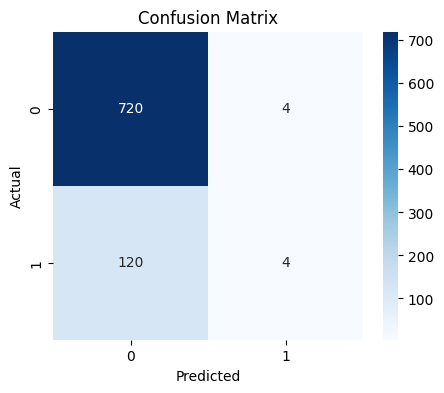

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are defined elsewhere

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)
y_pred_lr = model.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Accuracy: 0.7653301886792453
Precision: 0.23404255319148937
Recall: 0.2661290322580645
F1-score: 0.2490566037735849
Confusion Matrix:
[[616 108]
 [ 91  33]]


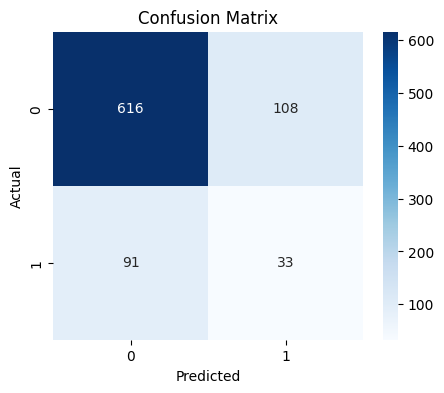

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are defined elsewhere

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a DecisionTreeClassifier instance
model = DecisionTreeClassifier()
# Fit the model
model.fit(X_train_imputed, y_train)
# Make predictions
y_pred_dt = model.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Accuracy: 0.8136792452830188
Precision: 0.21666666666666667
Recall: 0.10483870967741936
F1-score: 0.14130434782608695
Confusion Matrix:
[[677  47]
 [111  13]]


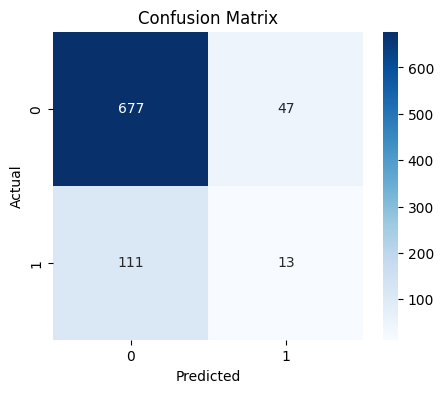

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model
knn.fit(X_train_imputed, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Print evaluation metrics
print("KNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Results:
Accuracy: 0.8549528301886793
Precision: 0.5294117647058824
Recall: 0.07258064516129033
F1 Score: 0.1276595744680851
Confusion Matrix:
[[716   8]
 [115   9]]


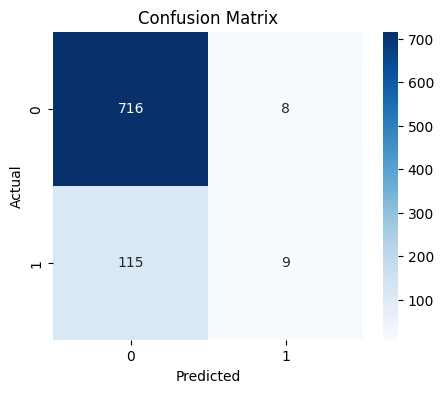

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier(n_estimators=100)
# Fit the model
rfc.fit(X_train_imputed, y_train)
# Make predictions
y_pred_rf = rfc.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


AdaBoost Results:
Accuracy: 0.8537735849056604
Precision: 0.5
Recall: 0.0967741935483871
F1 Score: 0.16216216216216214
Confusion Matrix:
[[712  12]
 [112  12]]


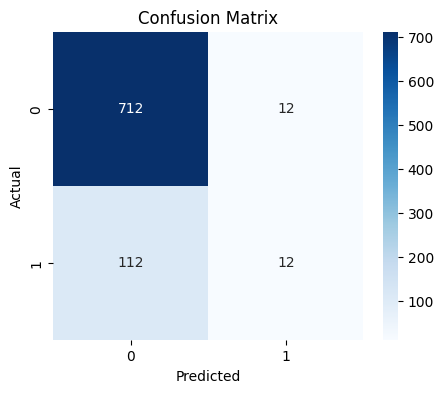

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an AdaBoostClassifier instance
abc = AdaBoostClassifier(n_estimators=100)
# Fit the model
abc.fit(X_train_imputed, y_train)
# Make predictions
y_pred_abc = abc.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_abc)
precision = precision_score(y_test, y_pred_abc)
recall = recall_score(y_test, y_pred_abc)
f1 = f1_score(y_test, y_pred_abc)
conf_matrix = confusion_matrix(y_test, y_pred_abc)

# Print evaluation metrics
print("AdaBoost Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


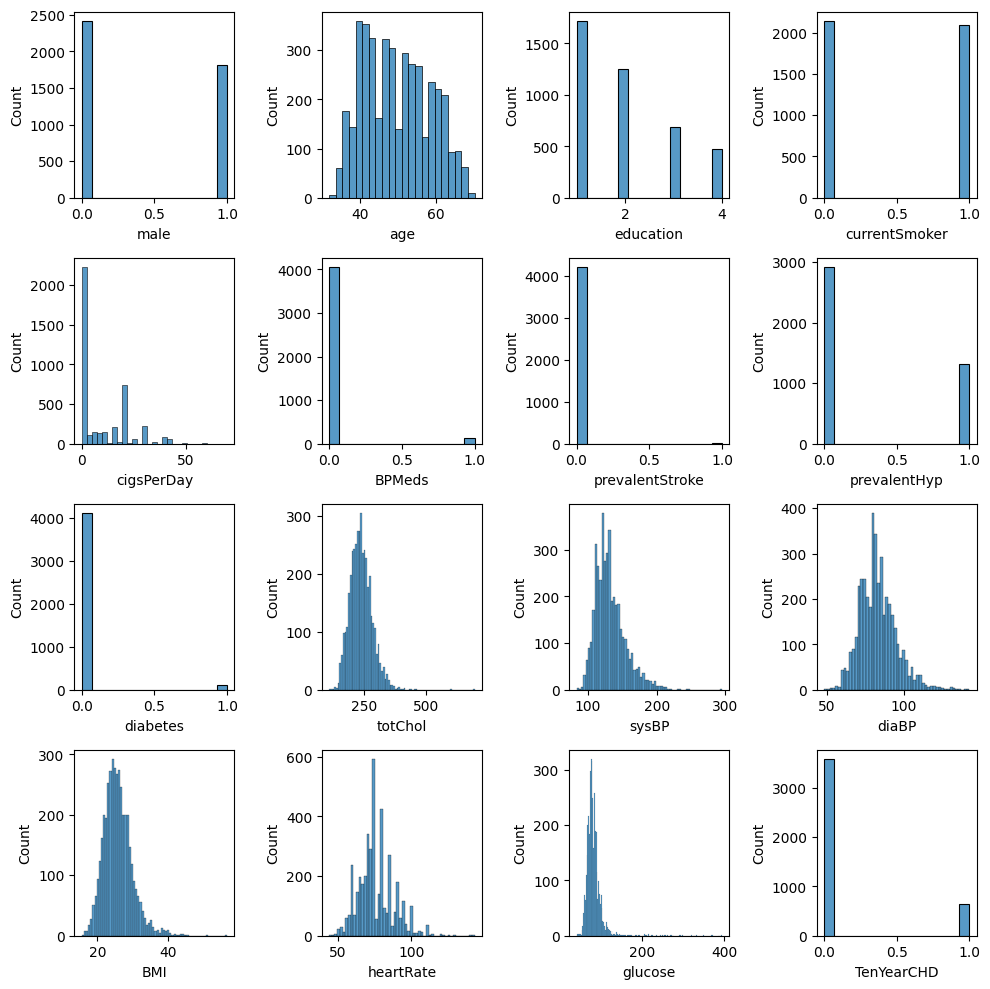

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/framingham.csv")

plt.figure(figsize=(10,10))

plotnumber = 1
for column in data:
    plt.subplot(4, 4, plotnumber)
    sns.histplot(x=data[column])
    plotnumber += 1

plt.tight_layout()
plt.show()


<Axes: xlabel='cigsPerDay', ylabel='Count'>

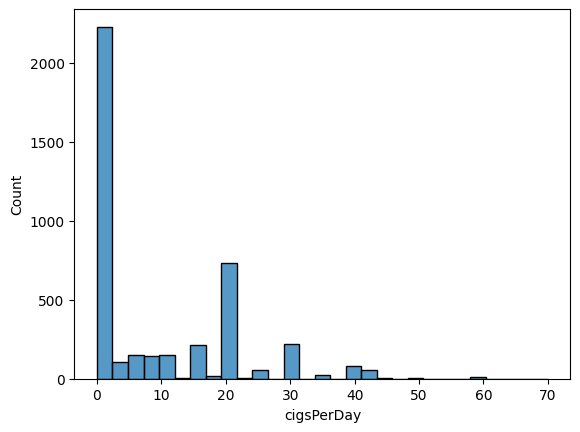

In [41]:
sns.histplot(data['cigsPerDay'])